In [123]:
# Capstone Project- Ritik Kumar

In [124]:
# Project Company - Idea Spice

Overview

Idea Spice is a boutique design and marketing firm with offices in the UAE and India.

Idea Spice offers breakthrough business solutions using design, strategy and innovative marketing.

Over the past 16 years we have successfully created over 1000 design solutions across a diverse range of industries. From governments to start ups, multi nationals to small and medium enterprises - our focus is to transform the client’s business.

In [126]:
#Dataset information


#The dataset has 4 .csv files. The columns/features in the given dataset are as follows:

#Employee Profile:

#Name: Name of the employee
#Employeid: Unique ID of an Employee
#Gender:  Gender of the employee
#Age: Age of an employe (in years)
#MaritalStatus: Marital Status of the Employee( Married/ Single/ Divorced etc)
#Education: Qualifications are in which field (Medical/marketing/technical etc)
#Qualifications: How many qualifications does an employee have
#Vertical: In which department employee is working
#Role: What is the employee role in the organization (Technician/Manager/HR etc)
#Work Experience: Total experience of the employee
#DistanceFromHome: Distance between office and employee home


#Employee Satisfaction:

#Employeid: Unique ID of an Employee
#Turnover: Retention rate of an employee
#Traveling: Whether traveling is required in job role of an employee
#Satisfaction: How much employee is satisfied in his/her role (1 minimum and 5 maximum)
#Engagement: How much engagement is required for the role (1 minimum and 5 maximum)
#Level: Level of the job( 1 being entry level and 5 means top management)
#Last Rating: Last financial year performance
#SalaryHike: Last salary increment in percentage
#Work&Life: balance between work and life (1 minimum and 5 maximum)
#Employee Behaviour:

#Employeid: Unique ID of an Employee
#YearsAtCompany: Years employee is working with the current organization
#YearsInCurrentRole: Years employee working at current designation
#YearsSinceLastPromotion: When was last promoted
#YearsWithCurrentManager: How long employee has been working with Current manager
#TrainingTimesLastYear: Training completed by an employee in last year
#Employee Salary:

#Employeid: Unique ID of an Employee
#Daily: Daily wages of the employees
#Hour:  Hours wages of the employees
#Monthly: Monthly wages of the employee
#MonthlyRate: Total salary paid to the employee
#OverTime: Whether an employee have done overtime or not
#Hours: Working hours of an Employee

In [127]:
#Task -Sanity check and data cleaning

#Task -Sanity check and data cleaning-
#Import the dataset
Concatenate the dataset on the basis of employeid
Using python Check for missing values, duplicate entries and irrelevant columns
Handle missing values by either removing rows/columns or filling them with appropriate values
Convert categorical variables to numerical variables using one-hot encoding or label encoding
Convert the target variable to 0s and 1s
Remove outliers and extreme values, if any
Perform basic feature engineering by creating new variables or combining existing variables, if necessary. Examples could include creating age groups, income brackets, or a ratio of income to credit limit.
Check for any correlations between variables, and handle any multicollinearity issues
Check the distribution of the variables and transform them if needed to normalize the data

In [1]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

#Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

#Library for building machine learning models
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [180]:
#We do have 4 csv file with common column name "EmployeID". So we have to merge all 4 files in single file

In [2]:
df1 = pd.read_csv('/content/Employee Profile.csv')

In [3]:
df1.head()

Name EmployeId Gender  Age MaritalStatus EducationField  Qualifications  \
0  Aaliyah   IDSL227      F   40        Single        Medical               3   
1    Aaron   IDSL030      M   46       Married      Marketing               4   
2     Abby   IDRD581      F   49        Single        Medical               3   
3     Abel   IDRD633      M   29       Married  Life Sciences               5   
4  Abigail   IDRD122      F   54       Married        Medical               3   

                 Vertical                       Role  Work Experience  \
0                   Sales            Sales Executive                1   
1                   Sales            Sales Executive                9   
2  Research & Development          Research Director                5   
3  Research & Development  Healthcare Representative                1   
4  Research & Development          Research Director                2   

   DistanceFromHome  
0                 2  
1                23  
2                13  
3                13  
4                 1

In [4]:
df1.describe()

Age  Qualifications  Work Experience  DistanceFromHome
count  1470.000000     1470.000000      1470.000000       1470.000000
mean     37.065306        2.876190         2.659184          9.278231
std       9.522562        1.019038         2.501769          8.157120
min      18.000000        1.000000         0.000000          1.000000
25%      30.000000        2.000000         1.000000          2.000000
50%      36.000000        3.000000         1.000000          7.000000
75%      44.000000        4.000000         4.000000         15.000000
max      59.000000        5.000000         9.000000         29.000000

In [5]:
df2 = pd.read_csv('/content/Employee Salary.csv')

In [6]:
df2.sample(5)

EmployeId  Daily  Hour  Monthly  MonthlyRate OverTime  Hours
291    IDSL117    448    89     2106        23537       No     80
54     IDRD304    231    94     2527        22870       No     80
1358   IDRD509    593    30     2898        22473       No     80
741    IDRD152    340    35     5730        14648       No     80
224    IDSL071    461    94    19766         9738       No     80

In [7]:
df3 = pd.read_csv('/content/Employee Behaviour.csv')

In [8]:
df3.sample(3)

EmployeId  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
867    IDRD935               5                   2                        1   
1208   IDSL279               3                   2                        1   
1465   IDRD899               9                   8                        0   

      YearsWithCurrentManager  TrainingTimesLastYear  
867                         3                      5  
1208                        1                      3  
1465                        0                      2

In [9]:
df4 = pd.read_csv('/content/Employee Satisfaction.csv')

In [10]:
df4.head()

EmployeId Turnover Travelling  Satisfaction  Engagement  JobLevel  \
0   IDSL227       No  Sometimes             4           2         2   
1   IDSL030       No         No             4           3         2   
2   IDRD581       No  Sometimes             4           3         4   
3   IDRD633       No  Sometimes             4           3         3   
4   IDRD122       No  Sometimes             1           1         4   

   Last Rating  SalaryHike  Work&Life  
0            4          23          3  
1            3          18          3  
2            3          14          4  
3            3          19          2  
4            3          13          3

In [11]:
merged_df1 = pd.merge(df1, df2, on='EmployeId')

In [12]:
merged_df1.head()

Name EmployeId Gender  Age MaritalStatus EducationField  Qualifications  \
0  Aaliyah   IDSL227      F   40        Single        Medical               3   
1    Aaron   IDSL030      M   46       Married      Marketing               4   
2     Abby   IDRD581      F   49        Single        Medical               3   
3     Abel   IDRD633      M   29       Married  Life Sciences               5   
4  Abigail   IDRD122      F   54       Married        Medical               3   

                 Vertical                       Role  Work Experience  \
0                   Sales            Sales Executive                1   
1                   Sales            Sales Executive                9   
2  Research & Development          Research Director                5   
3  Research & Development  Healthcare Representative                1   
4  Research & Development          Research Director                2   

   DistanceFromHome  Daily  Hour  Monthly  MonthlyRate OverTime  Hours  
0                 2    129    97     6287         4984      Yes     80  
1                23    134    64     4866        24079       No     80  
2                13    934    82    19833        25706      Yes     80  
3                13   1201    32     7854         3642       No     80  
4                 1   1478    42    18731        13254       No     80

In [13]:
merged_df2 = pd.merge(df3, df4, on='EmployeId')

In [14]:
df = pd.merge(merged_df1, merged_df2, on='EmployeId')

In [15]:
df.head()

Name EmployeId Gender  Age MaritalStatus EducationField  Qualifications  \
0  Aaliyah   IDSL227      F   40        Single        Medical               3   
1    Aaron   IDSL030      M   46       Married      Marketing               4   
2     Abby   IDRD581      F   49        Single        Medical               3   
3     Abel   IDRD633      M   29       Married  Life Sciences               5   
4  Abigail   IDRD122      F   54       Married        Medical               3   

                 Vertical                       Role  Work Experience  ...  \
0                   Sales            Sales Executive                1  ...   
1                   Sales            Sales Executive                9  ...   
2  Research & Development          Research Director                5  ...   
3  Research & Development  Healthcare Representative                1  ...   
4  Research & Development          Research Director                2  ...   

   YearsWithCurrentManager  TrainingTimesLastYear  Turnover  Travelling  \
0                        1                      1        No   Sometimes   
1                        7                      2        No          No   
2                        7                      2        No   Sometimes   
3                        8                      3        No   Sometimes   
4                        1                      3        No   Sometimes   

   Satisfaction Engagement  JobLevel  Last Rating  SalaryHike  Work&Life  
0             4          2         2            4          23          3  
1             4          3         2            3          18          3  
2             4          3         4            3          14          4  
3             4          3         3            3          19          2  
4             1          1         4            3          13          3  

[5 rows x 30 columns]

In [16]:
#Merged file information
df.shape

(1470, 30)

In [17]:
#Computing Total No. of Missing Values and the Percentage of Missing Values.
missing_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(df))*100,2)
missing_df

Total No. of Missing Values  % of Missing Values
Name                                               0                  0.0
EmployeId                                          0                  0.0
Gender                                             0                  0.0
Age                                                0                  0.0
MaritalStatus                                      0                  0.0
EducationField                                     0                  0.0
Qualifications                                     0                  0.0
Vertical                                           0                  0.0
Role                                               0                  0.0
Work Experience                                    0                  0.0
DistanceFromHome                                   0                  0.0
Daily                                              0                  0.0
Hour                                               0                  0.0
Monthly                                            0                  0.0
MonthlyRate                                        0                  0.0
OverTime                                           0                  0.0
Hours                                              0                  0.0
YearsAtCompany                                     0                  0.0
YearsInCurrentRole                                 0                  0.0
YearsSinceLastPromotion                            0                  0.0
YearsWithCurrentManager                            0                  0.0
TrainingTimesLastYear                              0                  0.0
Turnover                                           0                  0.0
Travelling                                         0                  0.0
Satisfaction                                       0                  0.0
Engagement                                         0                  0.0
JobLevel                                           0                  0.0
Last Rating                                        0                  0.0
SalaryHike                                         0                  0.0
Work&Life                                          0                  0.0

In [19]:
#Dataset Shape information and type information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     1470 non-null   object
 1   EmployeId                1470 non-null   object
 2   Gender                   1470 non-null   object
 3   Age                      1470 non-null   int64 
 4   MaritalStatus            1470 non-null   object
 5   EducationField           1470 non-null   object
 6   Qualifications           1470 non-null   int64 
 7   Vertical                 1470 non-null   object
 8   Role                     1470 non-null   object
 9   Work Experience          1470 non-null   int64 
 10  DistanceFromHome         1470 non-null   int64 
 11  Daily                    1470 non-null   int64 
 12  Hour                     1470 non-null   int64 
 13  Monthly                  1470 non-null   int64 
 14  MonthlyRate              1470 non-null  

In [20]:
# saved merged file in csv in one common name
df.to_csv('merged_employees.csv', index=False)

In [21]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1470
Number of columns: 30


In [22]:
#duplicate lines
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [23]:
#descriptive statistics of each column
df.describe()

Age  Qualifications  Work Experience  DistanceFromHome  \
count  1470.000000     1470.000000      1470.000000       1470.000000   
mean     37.065306        2.876190         2.659184          9.278231   
std       9.522562        1.019038         2.501769          8.157120   
min      18.000000        1.000000         0.000000          1.000000   
25%      30.000000        2.000000         1.000000          2.000000   
50%      36.000000        3.000000         1.000000          7.000000   
75%      44.000000        4.000000         4.000000         15.000000   
max      59.000000        5.000000         9.000000         29.000000   

             Daily         Hour       Monthly   MonthlyRate   Hours  \
count  1470.000000  1470.000000   1470.000000   1470.000000  1470.0   
mean    763.046939    65.074830   6752.281633  14539.982313    80.0   
std     426.331994    20.604377   5141.197951   7172.390592     0.0   
min     107.000000    30.000000   1102.000000   2125.000000    80.0   
25%     403.750000    47.000000   2919.250000   8688.750000    80.0   
50%     704.500000    66.000000   4854.000000  14717.500000    80.0   
75%    1151.000000    83.000000   8838.500000  20455.500000    80.0   
max    1495.000000   100.000000  19847.000000  26933.000000    80.0   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         6.772109            4.066667                 2.095238   
std          5.777745            3.741427                 3.261537   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 2.000000   
max         33.000000           17.000000                15.000000   

       YearsWithCurrentManager  TrainingTimesLastYear  Satisfaction  \
count              1470.000000            1470.000000   1470.000000   
mean                  3.945578               2.769388      2.702041   
std                   3.702486               1.350900      1.095039   
min                   0.000000               0.000000      1.000000   
25%                   1.000000               2.000000      2.000000   
50%                   2.000000               2.000000      3.000000   
75%                   7.000000               3.000000      4.000000   
max                  17.000000               6.000000      4.000000   

        Engagement     JobLevel  Last Rating   SalaryHike    Work&Life  
count  1470.000000  1470.000000  1470.000000  1470.000000  1470.000000  
mean      2.712245     2.087075     3.162585    15.122449     2.798639  
std       0.731141     1.109663     0.369112     3.817658     0.714718  
min       1.000000     1.000000     3.000000    11.000000     1.000000  
25%       2.000000     1.000000     3.000000    12.000000     2.000000  
50%       3.000000     2.000000     3.000000    14.000000     3.000000  
75%       3.000000     3.000000     3.000000    18.000000     3.000000  
max       4.000000     5.000000     4.000000    25.000000     4.000000

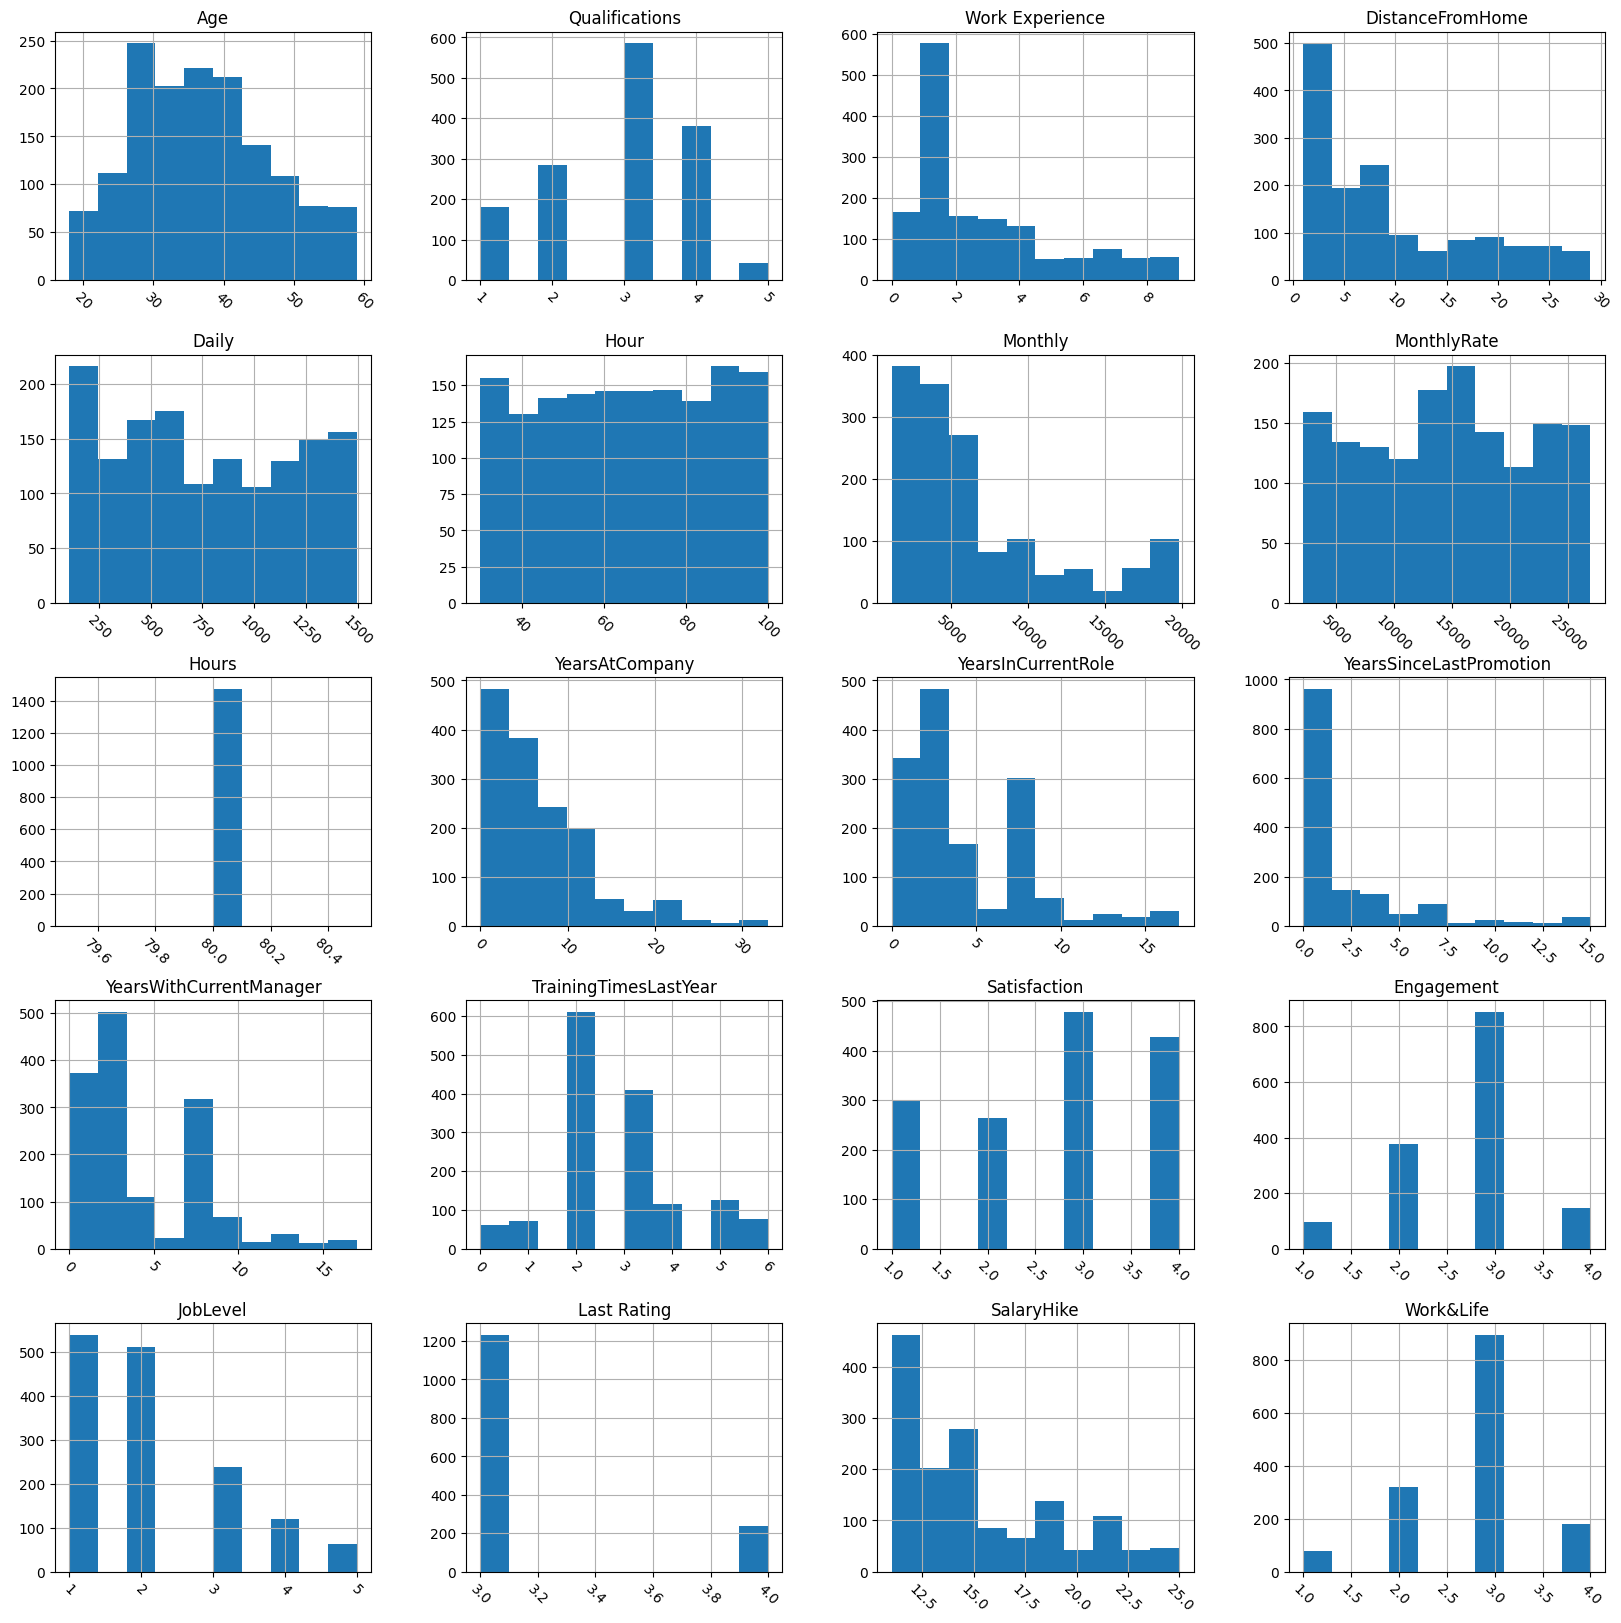

In [24]:
#histogram for numerical columns
df.hist(figsize=(20,20), xrot=-45)
plt.show()

In [25]:
#Data type of each column
df.dtypes

Name                       object
EmployeId                  object
Gender                     object
Age                         int64
MaritalStatus              object
EducationField             object
Qualifications              int64
Vertical                   object
Role                       object
Work Experience             int64
DistanceFromHome            int64
Daily                       int64
Hour                        int64
Monthly                     int64
MonthlyRate                 int64
OverTime                   object
Hours                       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrentManager     int64
TrainingTimesLastYear       int64
Turnover                   object
Travelling                 object
Satisfaction                int64
Engagement                  int64
JobLevel                    int64
Last Rating                 int64
SalaryHike                  int64
Work&Life     

In [26]:
# We use select_dtypes method to list columns of type numerical and category
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Name', 'EmployeId', 'Gender', 'MaritalStatus', 'EducationField',
       'Vertical', 'Role', 'OverTime', 'Turnover', 'Travelling'],
      dtype='object')
Index(['Age', 'Qualifications', 'Work Experience', 'DistanceFromHome', 'Daily',
       'Hour', 'Monthly', 'MonthlyRate', 'Hours', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'TrainingTimesLastYear', 'Satisfaction',
       'Engagement', 'JobLevel', 'Last Rating', 'SalaryHike', 'Work&Life'],
      dtype='object')


In [27]:
# Consider the value set of categorical attributes
num_cols = list(set(df._get_numeric_data()))
cat_cols = list(set(df.columns) - set(df._get_numeric_data()))
for col in cat_cols:
    print('Unique values of ', col, set(df[col]))

Unique values of  Role {'Sales Executive', 'Manufacturing Director', 'Research Scientist', 'Laboratory Technician', 'Human Resources', 'Manager', 'Sales Representative', 'Healthcare Representative', 'Research Director'}
Unique values of  Name {'Katherine', 'Jalen', 'Jayla', 'Norman', 'Ollie', 'Stewart', 'Dean', 'Ebony', 'Keith', 'Dina', 'Kylie', 'Noah', 'Desmond', 'Allie', 'Angel', 'Latasha', 'Dallas', 'Deborah', 'Shelly', 'Rhonda', 'Johnathan', 'Traci', 'Taylor', 'Dana', 'Armando', 'Verna', 'Cathy', 'Salvatore', 'Quinton', 'Irvin', 'Ismael', 'Dylan', 'Randal', 'Emily', 'Noelle', 'Ora', 'Herbert', 'Randall', 'Randi', 'Ruby', 'Aria', 'Levi', 'Jackson', 'Roosevelt', 'Jermaine', 'Daphne', 'Calvin', 'Lindsay', 'Charity', 'Jasmine', 'Mckenzie', 'Reuben', 'Tatiana', 'Rena', 'Goldie', 'Brendan', 'Jill', 'Jan', 'Julie', 'Lucile', 'Derek', 'Daryl', 'Cayden', 'Gwendolyn', 'Macy', 'Kyra', 'Jenna', 'Joshua', 'Kellie', 'Myrtle', 'Eugenia', 'Trisha', 'Meagan', 'Reginald', 'Walter', 'Caitlyn', 'Emman

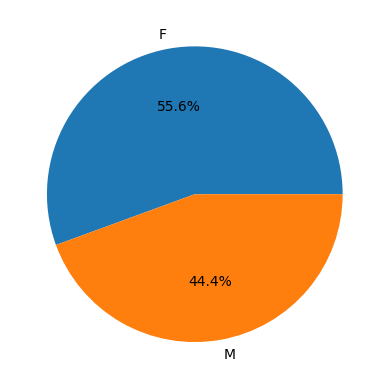

In [28]:
#Ratio of men and women in the organization.
plot_df = df.copy()
plot_df= plot_df['Gender'].value_counts()

plt.pie(plot_df, labels=plot_df.index, autopct='%1.1f%%')
plt.show()

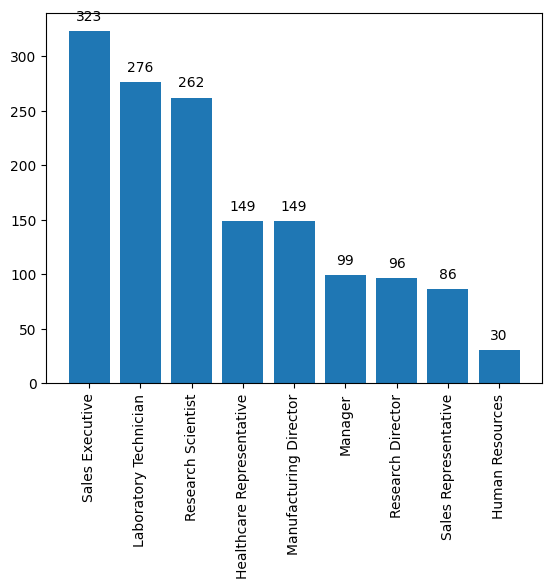

In [29]:
#Ratio of Role in work
plot_df = df.copy()
plot_df = plot_df['Role'].value_counts()

plt.bar(plot_df.index, plot_df.values)
plt.xticks(rotation=90)
for i, v in enumerate(plot_df.values):
    plt.text(i, v+10, str(v), ha='center')

plt.show()

In [30]:
# correlations value between each independent variable and the depen
df.corr()

<ipython-input-30-76f2fc01d700>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Age  Qualifications  Work Experience  \
Age                      1.000000        0.168775         0.263648   
Qualifications           0.168775        1.000000         0.069417   
Work Experience          0.263648        0.069417         1.000000   
DistanceFromHome        -0.000681        0.027077        -0.019835   
Daily                   -0.015840       -0.005173         0.006540   
Hour                     0.033740        0.003911        -0.014679   
Monthly                  0.450740        0.082919         0.170346   
MonthlyRate             -0.034034       -0.002374         0.014936   
Hours                         NaN             NaN              NaN   
YearsAtCompany           0.274847        0.081110        -0.046538   
YearsInCurrentRole       0.166661        0.101081        -0.074516   
YearsSinceLastPromotion  0.243112        0.077899        -0.000191   
YearsWithCurrentManager  0.211945        0.083012        -0.047348   
TrainingTimesLastYear    0.008368        0.025234        -0.031731   
Satisfaction             0.000039       -0.021491        -0.007772   
Engagement               0.055303        0.065444         0.037899   
JobLevel                 0.477536        0.103452         0.178912   
Last Rating             -0.000699       -0.064084        -0.004825   
SalaryHike              -0.016923       -0.045970        -0.013589   
Work&Life                0.027239       -0.026776         0.013370   

                         DistanceFromHome     Daily      Hour   Monthly  \
Age                             -0.000681 -0.015840  0.033740  0.450740   
Qualifications                   0.027077 -0.005173  0.003911  0.082919   
Work Experience                 -0.019835  0.006540 -0.014679  0.170346   
DistanceFromHome                 1.000000 -0.057532 -0.032421  0.024039   
Daily                           -0.057532  1.000000 -0.036091 -0.010337   
Hour                            -0.032421 -0.036091  1.000000  0.065810   
Monthly                          0.024039 -0.010337  0.065810  1.000000   
MonthlyRate                      0.010122 -0.036442 -0.020962  0.035305   
Hours                                 NaN       NaN       NaN       NaN   
YearsAtCompany                   0.014822 -0.003492 -0.012597  0.403145   
YearsInCurrentRole               0.002046  0.016156 -0.015359  0.259666   
YearsSinceLastPromotion          0.059849  0.010464 -0.017225  0.308181   
YearsWithCurrentManager          0.018624 -0.052963 -0.015714  0.307545   
TrainingTimesLastYear           -0.039455  0.024635  0.020186 -0.009758   
Satisfaction                    -0.016548  0.005733 -0.027462 -0.004413   
Engagement                       0.018798 -0.029437  0.059044  0.009715   
JobLevel                         0.030187 -0.032321  0.060333  0.842783   
Last Rating                      0.016844  0.005692  0.008245  0.021545   
SalaryHike                       0.010054  0.003223 -0.010778 -0.026839   
Work&Life                        0.024562 -0.017998 -0.007528  0.019715   

                         MonthlyRate  Hours  YearsAtCompany  \
Age                        -0.034034    NaN        0.274847   
Qualifications             -0.002374    NaN        0.081110   
Work Experience             0.014936    NaN       -0.046538   
DistanceFromHome            0.010122    NaN        0.014822   
Daily                      -0.036442    NaN       -0.003492   
Hour                       -0.020962    NaN       -0.012597   
Monthly                     0.035305    NaN        0.403145   
MonthlyRate                 1.000000    NaN        0.059068   
Hours                            NaN    NaN             NaN   
YearsAtCompany              0.059068    NaN        1.000000   
YearsInCurrentRole          0.061384    NaN        0.603121   
YearsSinceLastPromotion    -0.046310    NaN        0.535934   
YearsWithCurrentManager     0.059022    NaN        0.631212   
TrainingTimesLastYear      -0.012401    NaN       -0.050259   
Satisfaction               -0.030750  

In [31]:
## Convert categorical variables to numerical variables using one-hot encoding or label encoding
from sklearn.preprocessing import LabelEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Vertical'] = le.fit_transform(df['Vertical'])
df['Role'] = le.fit_transform(df['Role'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Turnover'] = le.fit_transform(df['Turnover'])
df['Travelling'] = le.fit_transform(df['Travelling'])


In [33]:
df['Gender'].value_counts()

0    817
1    653
Name: Gender, dtype: int64

In [34]:
df['MaritalStatus'].value_counts()

1    659
2    462
0    349
Name: MaritalStatus, dtype: int64

In [35]:
df['EducationField'].value_counts()

1    603
3    465
2    158
5    126
4     95
0     23
Name: EducationField, dtype: int64

In [36]:
df['OverTime'].value_counts()

0    1069
1     401
Name: OverTime, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     1470 non-null   object
 1   EmployeId                1470 non-null   object
 2   Gender                   1470 non-null   int64 
 3   Age                      1470 non-null   int64 
 4   MaritalStatus            1470 non-null   int64 
 5   EducationField           1470 non-null   int64 
 6   Qualifications           1470 non-null   int64 
 7   Vertical                 1470 non-null   int64 
 8   Role                     1470 non-null   int64 
 9   Work Experience          1470 non-null   int64 
 10  DistanceFromHome         1470 non-null   int64 
 11  Daily                    1470 non-null   int64 
 12  Hour                     1470 non-null   int64 
 13  Monthly                  1470 non-null   int64 
 14  MonthlyRate              1470 non-null  

In [38]:
df.drop(['Name','EmployeId'], axis=1, inplace= True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   1470 non-null   int64
 1   Age                      1470 non-null   int64
 2   MaritalStatus            1470 non-null   int64
 3   EducationField           1470 non-null   int64
 4   Qualifications           1470 non-null   int64
 5   Vertical                 1470 non-null   int64
 6   Role                     1470 non-null   int64
 7   Work Experience          1470 non-null   int64
 8   DistanceFromHome         1470 non-null   int64
 9   Daily                    1470 non-null   int64
 10  Hour                     1470 non-null   int64
 11  Monthly                  1470 non-null   int64
 12  MonthlyRate              1470 non-null   int64
 13  OverTime                 1470 non-null   int64
 14  Hours                    1470 non-null   int64
 15  Year

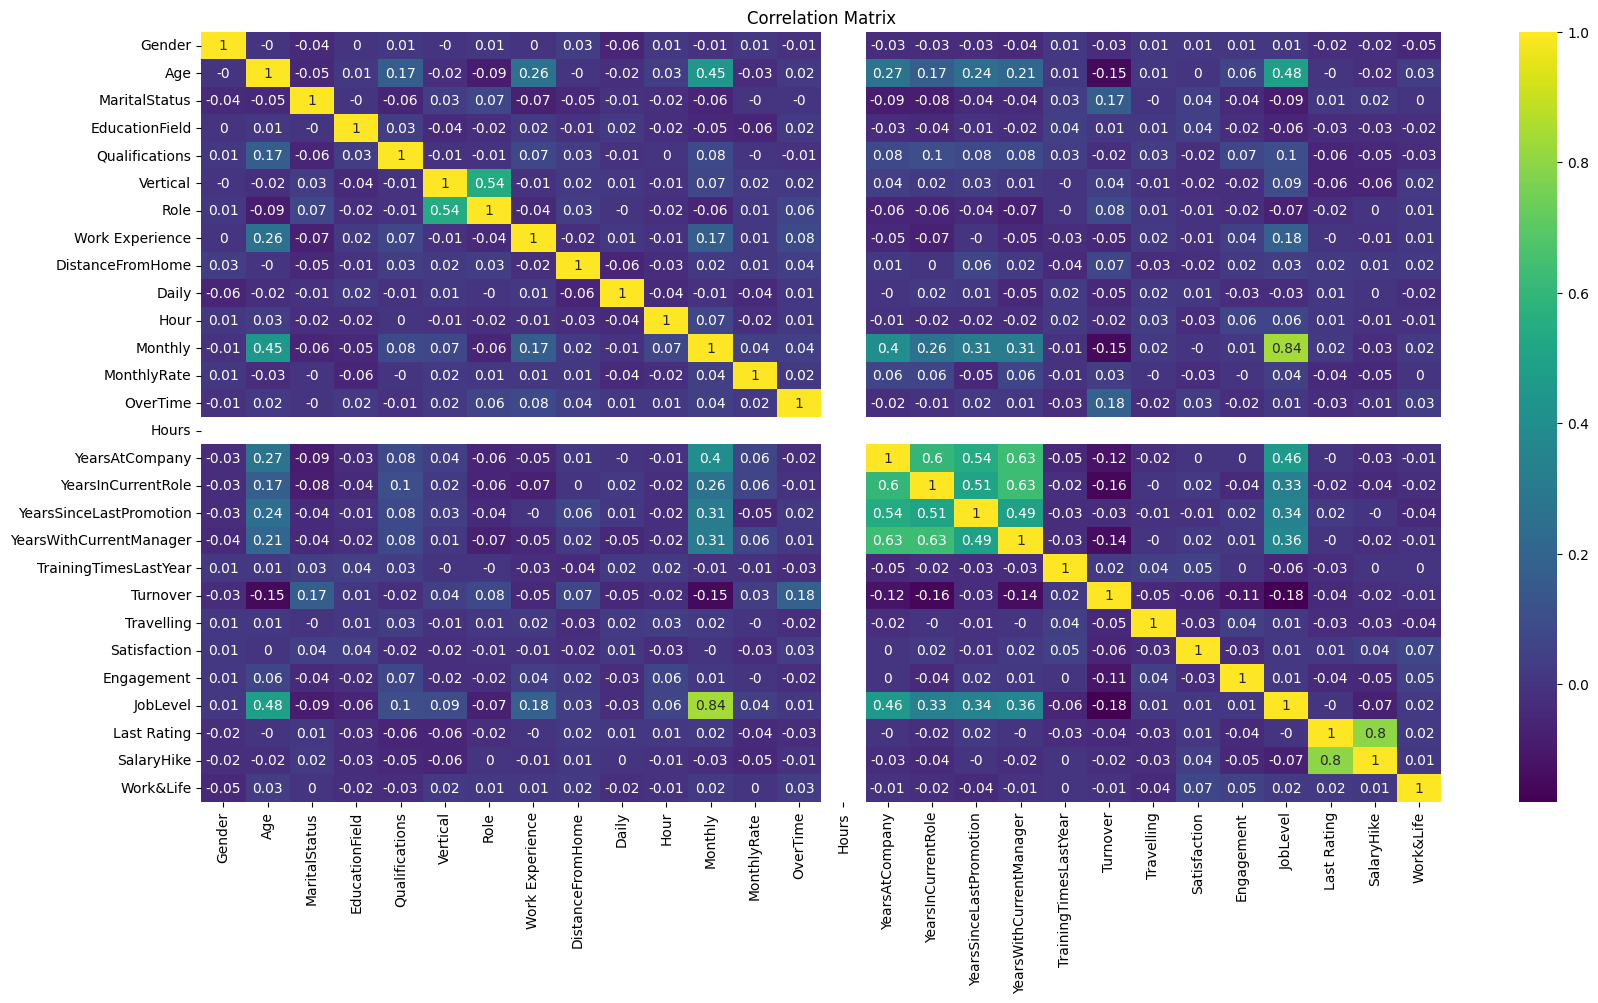

In [40]:
#convert all columns into int so now checking correction
corr = round(df.corr(), 2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [61]:
#Check for any correlations between variables, and handle any multicollinearity issues
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [51]:
#Remove outliers and extreme values, if any


In [50]:
import plotly.express as px

for column in df.columns:
    fig = px.box(df, y=column)
    fig.show()


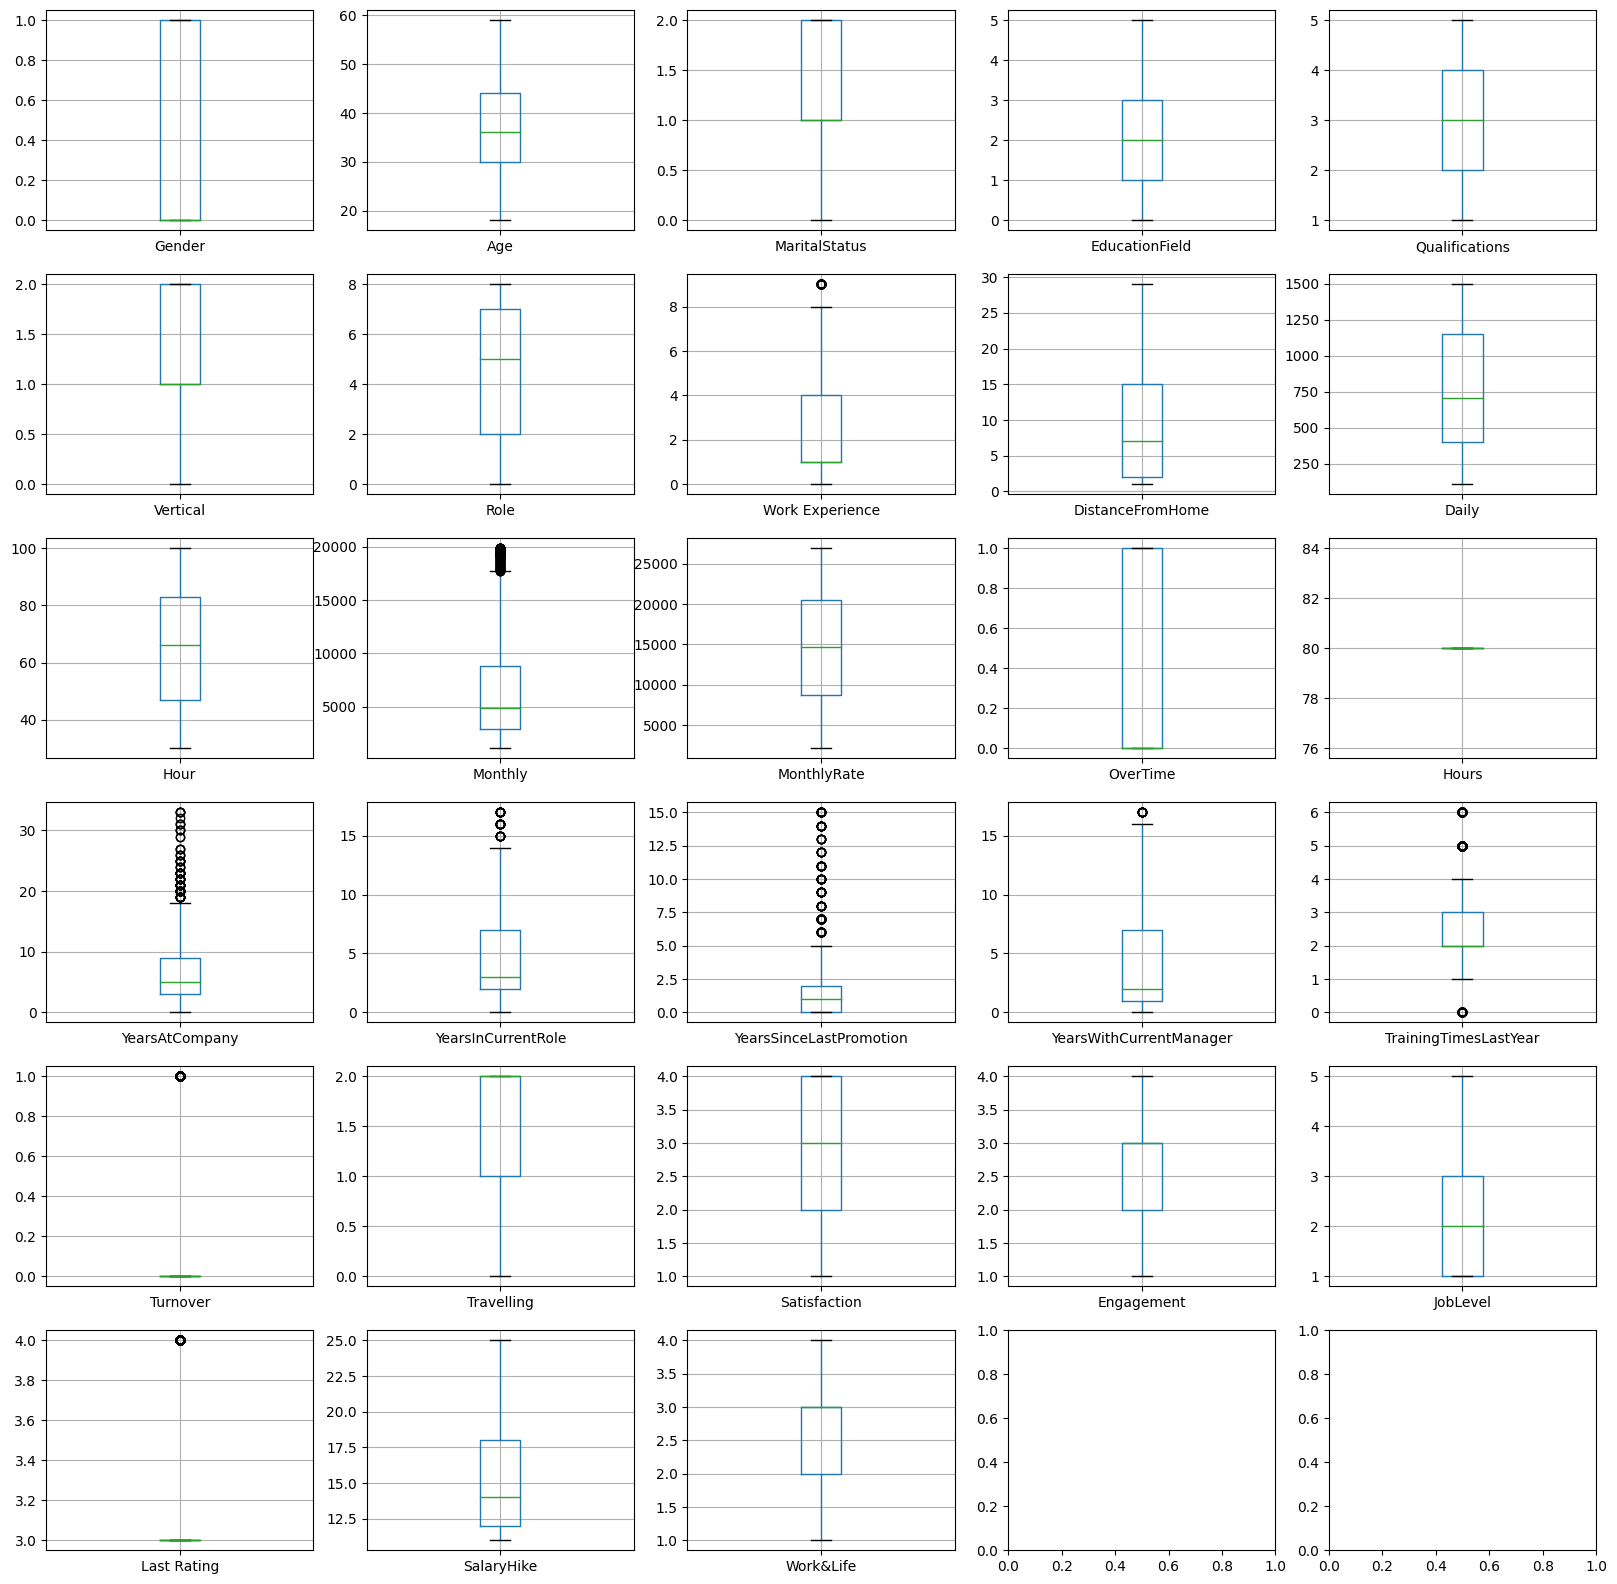

In [56]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

for ax, column in zip(axes.flatten(), df.columns):
    df.boxplot(column=column, ax=ax)

plt.show()


<Axes: >

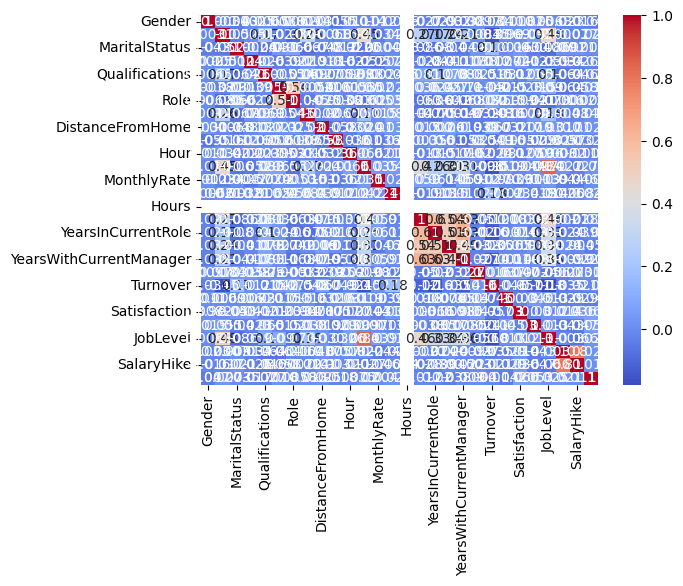

In [58]:
#Check for any correlations between variables, and handle any multicollinearity issues

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


##Building a machine learning model

In [96]:
#Logistic Regression for Binary Classification


In [168]:
#**Create a set of input attributes and a set of target variables from the original data set.**
df_copy=df.copy()

In [169]:
X=np.array(df_copy.drop(['Turnover'],axis=1))
y=np.array(df_copy['Turnover'])

In [170]:
#**Divide data set into training set and test set:**
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [171]:
print(X_train.shape)
print(X_test.shape)

(1102, 27)
(368, 27)


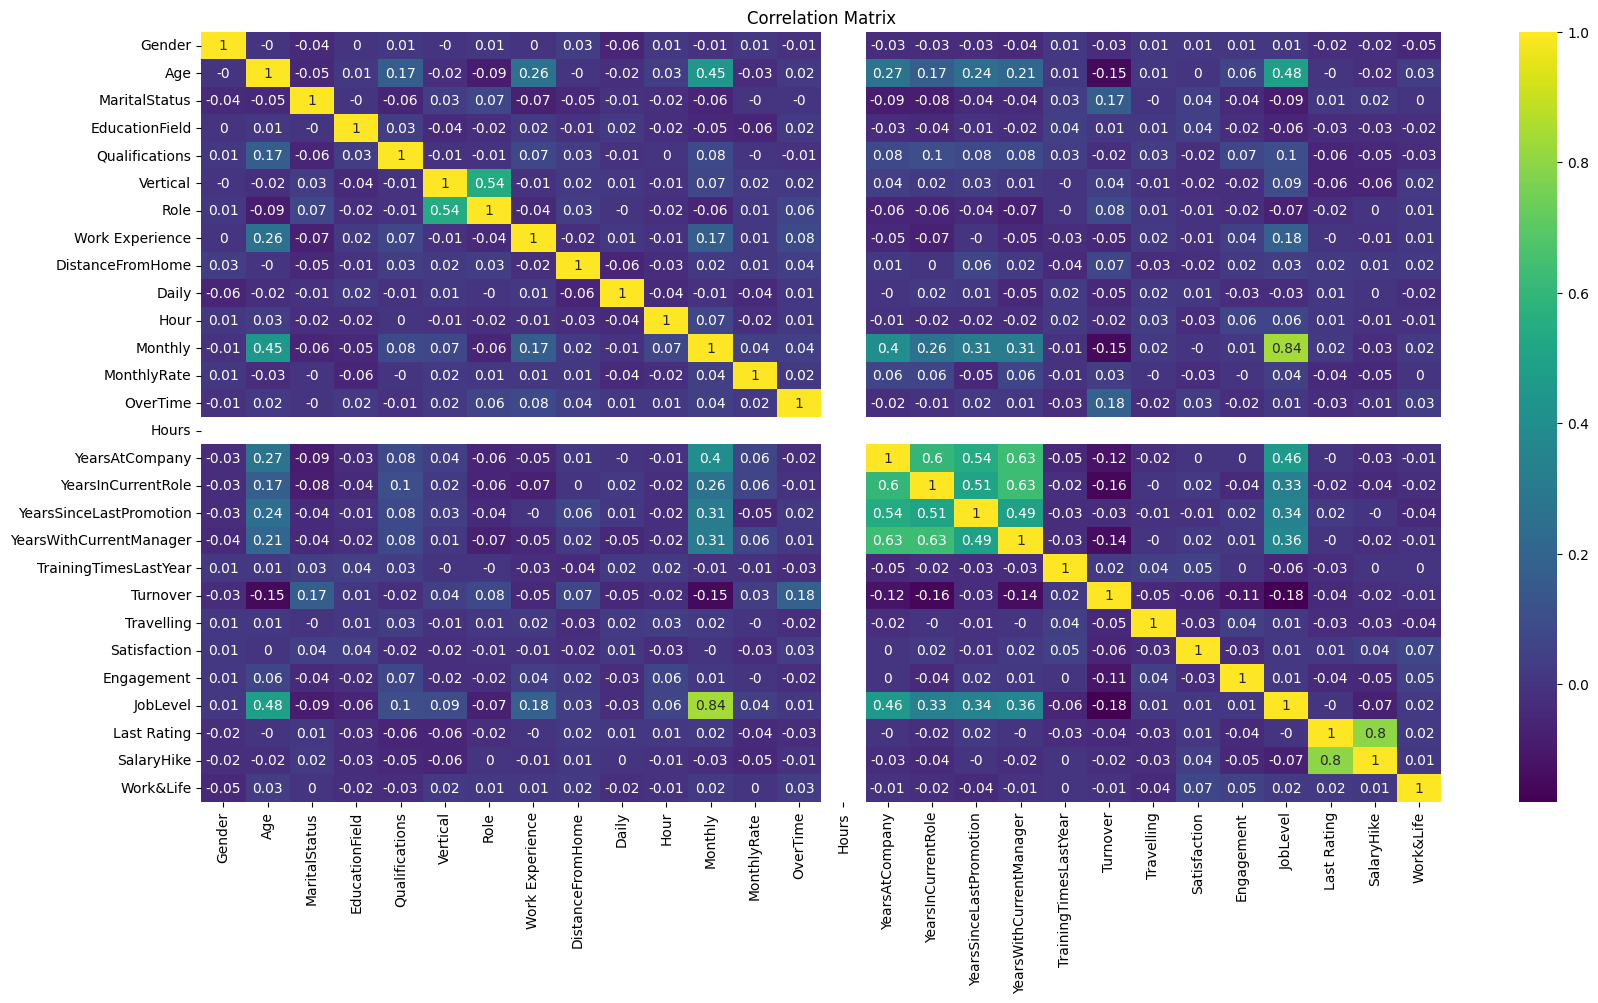

In [172]:
corr = round(df.corr(), 2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
# Assuming X is a DataFrame and y is a Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

model = RandomForestClassifier(n_estimators=1000, random_state=123)
model.fit(X_train, y_train)


#X_df = pd.DataFrame(X, columns=your_column_names)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(len(X.columns))), y=importances[indices], edgecolor='black')
plt.xticks(range(len(X.columns)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


NameError: ignored